## Analiza zakupów w piekarni

### Wstęp
Dane pochodzą ze strony Kaggle i są dostępne pod adresem https://www.kaggle.com/datasets/akashdeepkuila/bakery (data pobrania 07.11.2022)
Zestaw danych zawiera codzienne szczegóły transakcji klientów od 2016-01-11 do 2017-12-17.



#### Importowanie potrzebnych bibliotek/paczek

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Wczytanie danych oraz sprawdzenie poprawności załadowanych danych


In [5]:
backery = pd.read_csv("bakery.csv")
backery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


#### Przyjrzenie się danym

In [6]:
backery.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


#### Sprawdzenie brakujących danych

In [7]:
backery.count()

TransactionNo    20507
Items            20507
DateTime         20507
Daypart          20507
DayType          20507
dtype: int64

In [8]:
backery.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

#### Wniosek
Każna komórka tabeli jest zapełniona - brak pustych rekordów.

#### Zmiana typów

In [9]:
backery['DateTime'] = pd.to_datetime(backery['DateTime'])
backery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionNo  20507 non-null  int64         
 1   Items          20507 non-null  object        
 2   DateTime       20507 non-null  datetime64[ns]
 3   Daypart        20507 non-null  object        
 4   DayType        20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


#### Ilość sprzedanych produktów


In [10]:
backery['Items'].value_counts().head(20)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Items, dtype: int64

#### Top 5 Produktów

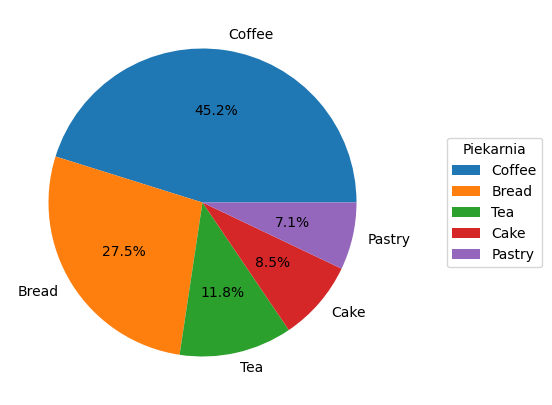

In [11]:
plot1 = backery['Items'].value_counts().head(5).plot.pie(ylabel="", figsize=(5, 5),autopct='%1.1f%%')
plt.legend(title="Piekarnia",loc="right",bbox_to_anchor=(1.4, 0.5))
plt.show()


Najlepiej sprzedającym się produktem była kawa, na drugim miejscu chleb.

#### Ilość zamówień w poszczególnych latach

In [12]:
backery.groupby([backery.DateTime.dt.year])['Items'].count()

DateTime
2016     8144
2017    12363
Name: Items, dtype: int64

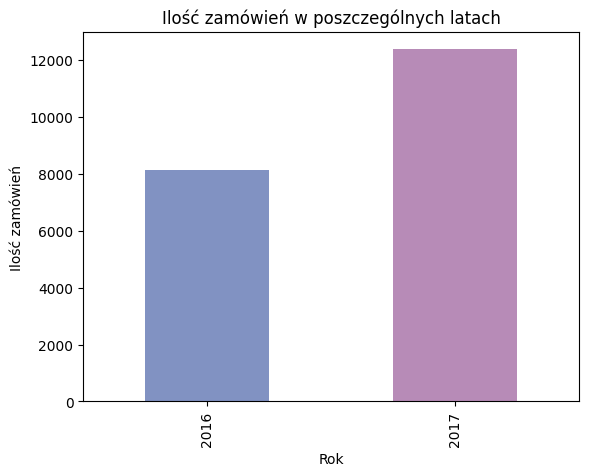

In [13]:
plot2 = backery.groupby([backery.DateTime.dt.year])['Items'].count().plot.bar(color=[ '#8192c2' ,'#b78bb7'],)
plt.title('Ilość zamówień w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Ilość zamówień')
plt.show()


Najwięcej zamówień przypada na rok 2017
#### Podział ilości zamówień na zamówienia w dni robocze oraz weekendy

In [14]:
backery.groupby([backery.DayType])['Items'].count()

DayType
Weekday    12807
Weekend     7700
Name: Items, dtype: int64

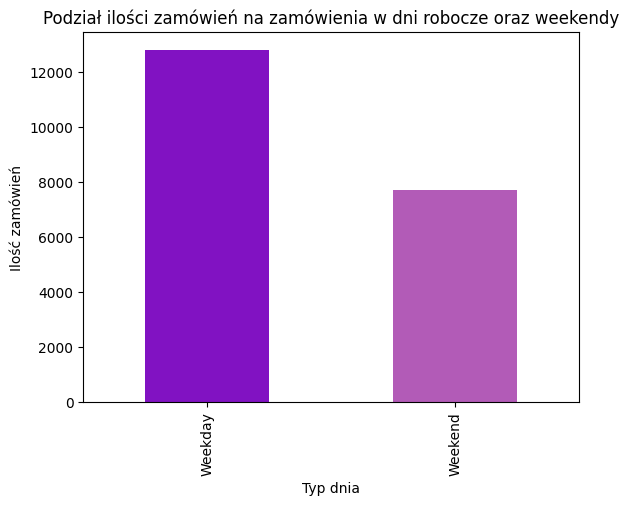

In [15]:
plot3 = backery.groupby([backery.DayType])['Items'].count().plot.bar(color=[ '#8112c2' ,'#b25bb7'],)
plt.title('Podział ilości zamówień na zamówienia w dni robocze oraz weekendy')
plt.xlabel('Typ dnia')
plt.ylabel('Ilość zamówień')
plt.show()

Większość zamówień jest wykonywana w dni robocze.
#### Podział ilości zamówień na pory dnia.

In [16]:
backery.groupby([backery.Daypart])['Items'].count()

Daypart
Afternoon    11569
Evening        520
Morning       8404
Night           14
Name: Items, dtype: int64

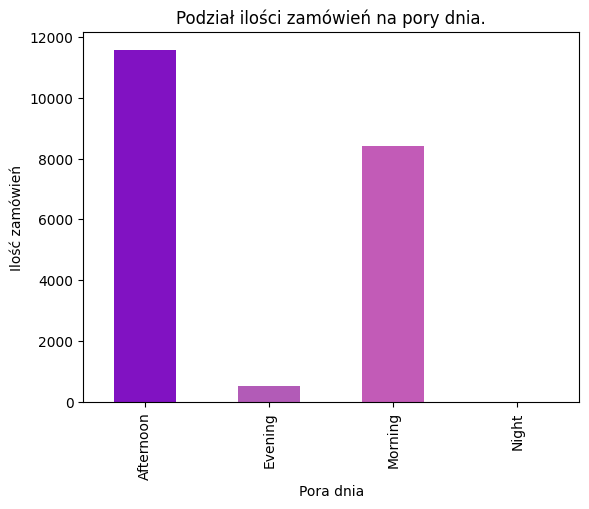

In [17]:
plot4 = backery.groupby([backery.Daypart])['Items'].count().plot.bar(color=[ '#8112c2' ,'#b25bb7', '#c25bb7'],)
plt.title('Podział ilości zamówień na pory dnia.')
plt.xlabel('Pora dnia')
plt.ylabel('Ilość zamówień')
plt.show()

Najwięcej zamówień jest wykonowyanych popołudniu oraz rano, natomiast najmniej wieczorem i nocą.
#### Co najczęściej ludzie najczęściej ludzie kupują z podziałem na pory dnia

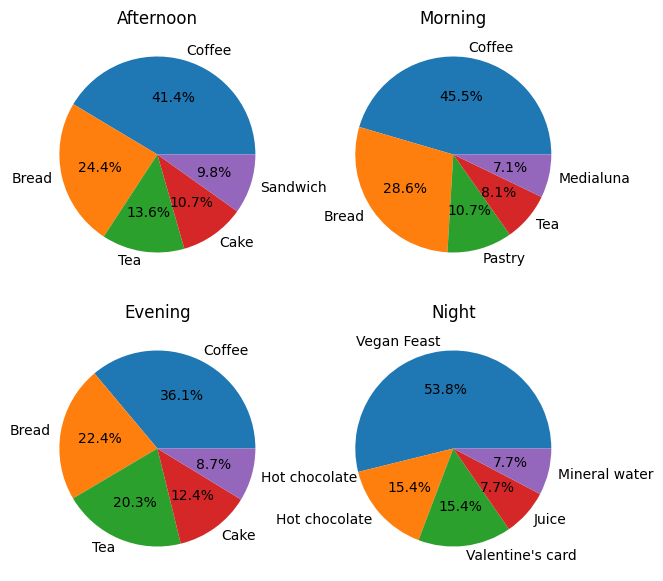

In [18]:
plt.subplot(2, 2, 1)
backery[(backery['Daypart'].str.contains("Afternoon"))]['Items'].value_counts().head(5).plot.pie(ylabel="", figsize=(7, 7),autopct='%1.1f%%')
plt.title('Afternoon')
plt.subplot(2, 2, 2)
backery[(backery['Daypart'].str.contains("Morning"))]['Items'].value_counts().head(5).plot.pie(ylabel="", figsize=(7, 7),autopct='%1.1f%%')
plt.title('Morning')
plt.subplot(2, 2, 3)
backery[(backery['Daypart'].str.contains("Evening"))]['Items'].value_counts().head(5).plot.pie(ylabel="", figsize=(7, 7),autopct='%1.1f%%')
plt.title('Evening')
plt.subplot(2, 2, 4)
backery[(backery['Daypart'].str.contains("Night"))]['Items'].value_counts().head(5).plot.pie(ylabel="", figsize=(7, 7),autopct='%1.1f%%')
plt.title('Night')
plt.show()

Rano i po południu oraz wieczorem ludzie najczęściej wybierają kawę, oraz chleb, co ciekawe w Nocy tendencja się zmienia, ponieważ na pierwszym miejscu jest Przysmak Wegański następnie gorąca czekolada oraz kartka walentynkowa.
#### Sprawdźmy, kiedy oraz ile zostało zakupionych kartek walentynkowych.

In [151]:
backery[(backery['Items'].str.contains("Valentine's card"))]

,TransactionNo,Items,DateTime,Daypart,DayType
11109,5539,Valentine's card,2017-01-28 13:53:37,Afternoon,Weekend
11707,5809,Valentine's card,2017-02-02 14:15:43,Afternoon,Weekday
12089,5981,Valentine's card,2017-04-02 16:16:30,Afternoon,Weekend
12151,6014,Valentine's card,2017-04-02 19:27:09,Evening,Weekend
12157,6018,Valentine's card,2017-04-02 19:56:24,Evening,Weekend
12160,6019,Valentine's card,2017-04-02 19:57:04,Evening,Weekend
12161,6020,Valentine's card,2017-04-02 19:59:23,Evening,Weekend
12720,6258,Valentine's card,2017-09-02 11:15:08,Morning,Weekday
12725,6260,Valentine's card,2017-09-02 11:24:19,Morning,Weekday
12842,6309,Valentine's card,2017-10-02 10:45:55,Morning,Weekday


Co ciekawe karty Walentynkowe nie są kupowane jedynie w okresie walentynkowym.

#### Ilość sprzedawanej kawy 

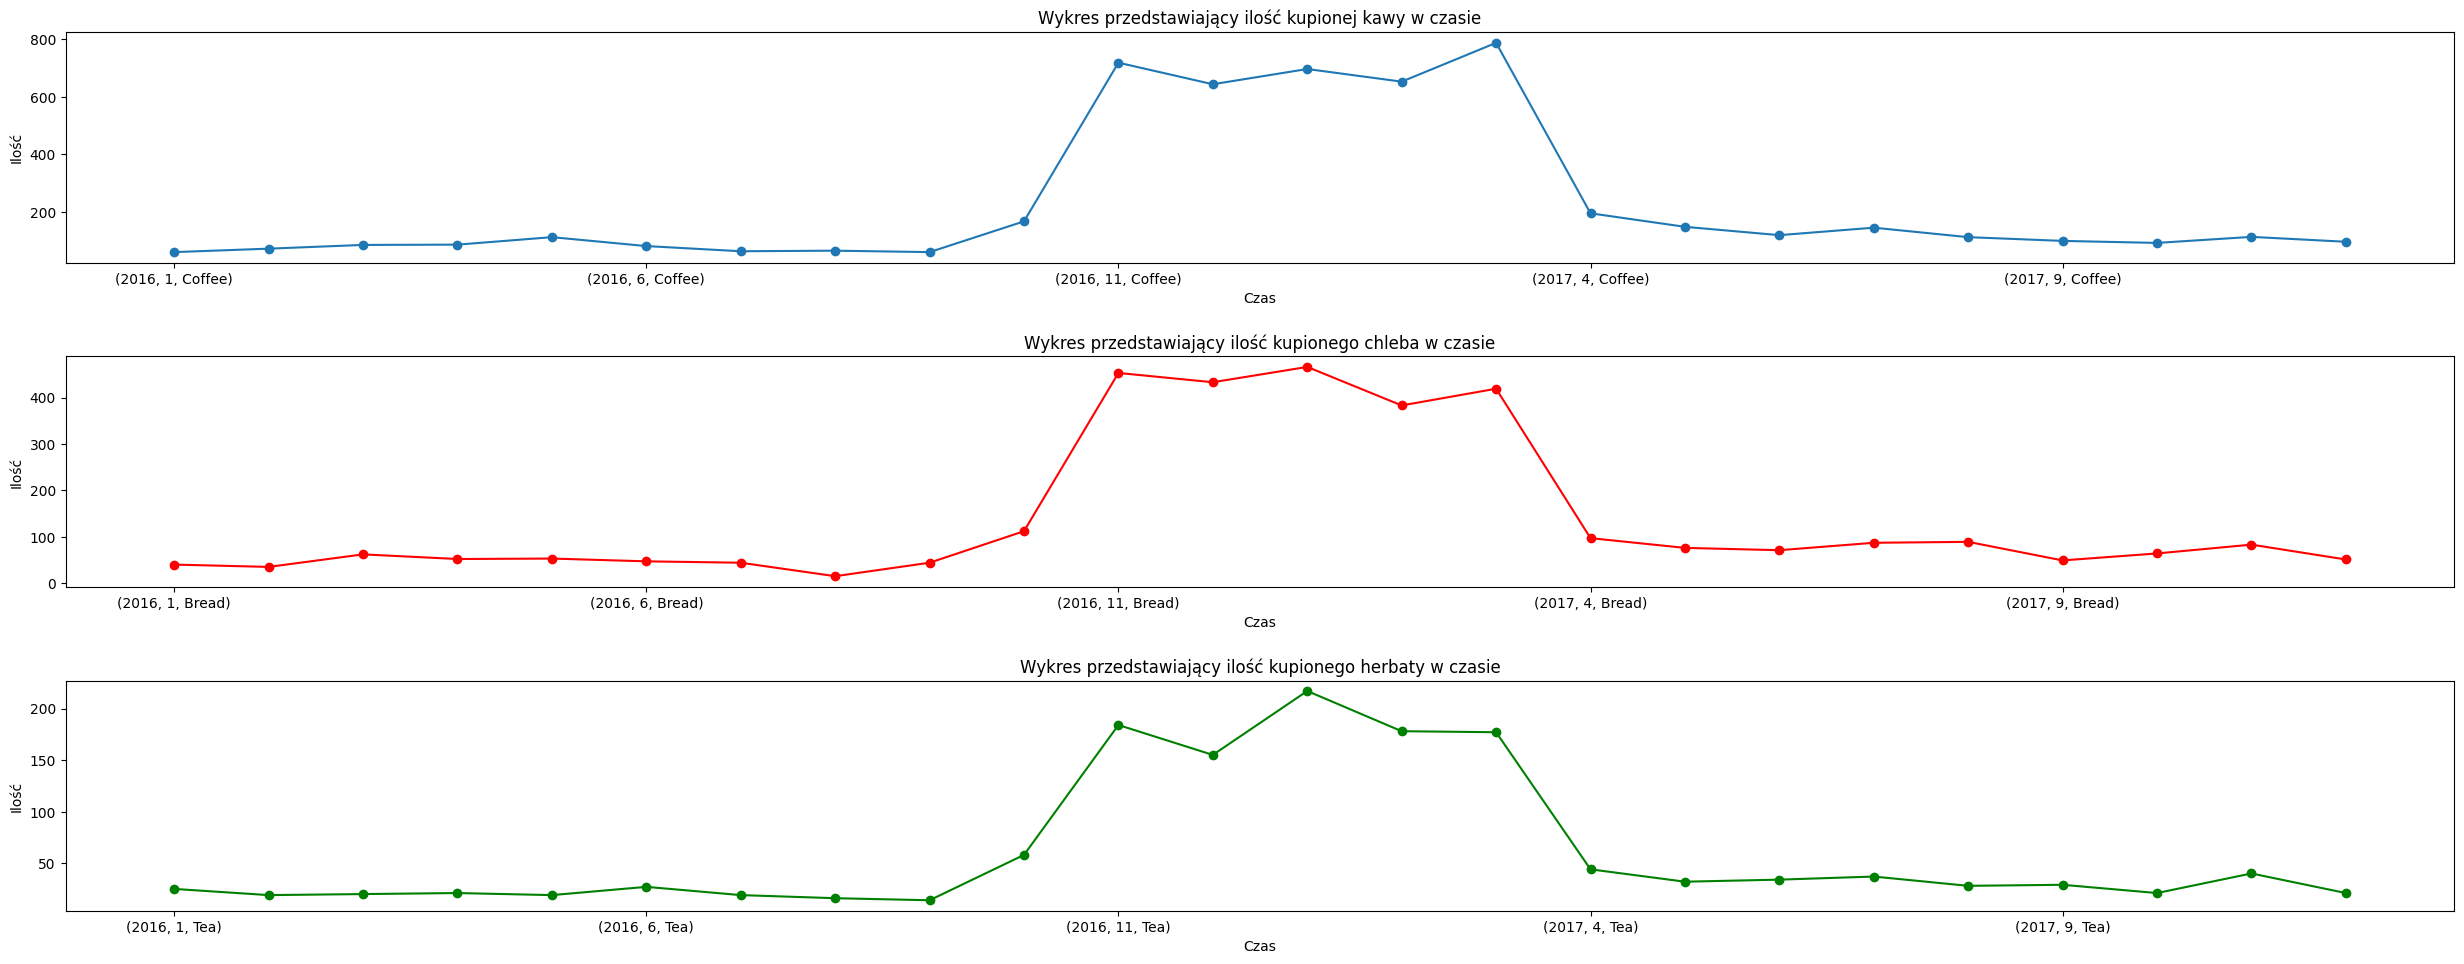

In [20]:
plt.subplot(3, 1, 1)
backery[(backery['Items'] == ("Coffee"))].groupby([backery.DateTime.dt.year, backery.DateTime.dt.month, backery.Items])['Items'].count().plot(figsize=(25, 10), marker = 'o')
plt.title('Wykres przedstawiający ilość kupionej kawy w czasie')
plt.ylabel('Ilość')
plt.xlabel('Czas')
plt.subplot(3, 1, 2)
backery[(backery['Items'] == ("Bread"))].groupby([backery.DateTime.dt.year, backery.DateTime.dt.month, backery.Items])['Items'].count().plot(figsize=(25, 10), marker = 'o', color = 'r')
plt.title('Wykres przedstawiający ilość kupionego chleba w czasie')
plt.ylabel('Ilość')
plt.xlabel('Czas')
plt.subplot(3, 1, 3)
backery[(backery['Items'] == ("Tea"))].groupby([backery.DateTime.dt.year, backery.DateTime.dt.month, backery.Items])['Items'].count().plot(figsize=(25, 10), marker = 'o', color = 'g')
plt.title('Wykres przedstawiający ilość kupionego herbaty w czasie')
plt.ylabel('Ilość')
plt.xlabel('Czas')
plt.tight_layout(pad=2.0)
plt.show()


Najwięcej zamówień przypada na okres od 10-2016 do 04-2017.